Required Package

ORC package
https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html

In [ ]:
# sudo apt-get install tesseract-ocr-eng
# sudo apt-get install tesseract-ocr-spa

In [ ]:
# !pip install unstructured
# !pip3 install pillow-heif
# !pip install unstructured-inference
# !pip install unstructured-pytesseract

Help


https://pypi.org/project/unstructured/

In [17]:
from unstructured.partition.auto import partition

Test English

In [10]:
# def partition_pdf(
#     filename: Optional[str] = None,
#     file: Optional[IO[bytes]] = None,
#     include_page_breaks: bool = False,
#     strategy: str = PartitionStrategy.AUTO,
#     infer_table_structure: bool = False,
#     ocr_languages: Optional[str] = None,  # changing to optional for deprecation
#     languages: Optional[list[str]] = None,
#     include_metadata: bool = True,  # used by decorator
#     metadata_filename: Optional[str] = None,  # used by decorator
#     metadata_last_modified: Optional[str] = None,
#     chunking_strategy: Optional[str] = None,  # used by decorator
#     hi_res_model_name: Optional[str] = None,
#     extract_images_in_pdf: bool = False,
#     extract_image_block_types: Optional[list[str]] = None,
#     extract_image_block_output_dir: Optional[str] = None,
#     extract_image_block_to_payload: bool = False,
#     date_from_file_object: bool = False,
#     starting_page_number: int = 1,
#     extract_forms: bool = False,
#     form_extraction_skip_tables: bool = True,
#     **kwargs: Any,
# ) -> list[Element]:

- ##### filename
        A string defining the target filename path.
-  #####  file
        A file-like object as bytes --> open(filename, "rb").
- #####  strategy
        The strategy to use for partitioning the PDF. Valid strategies are "hi_res",
        "ocr_only", and "fast". When using the "hi_res" strategy, the function uses
        a layout detection model to identify document elements. When using the
        "ocr_only" strategy, partition_pdf simply extracts the text from the
        document using OCR and processes it. If the "fast" strategy is used, the text
        is extracted directly from the PDF. The default strategy `auto` will determine
        when a page can be extracted using `fast` mode, otherwise it will fall back to `hi_res`.
- #####  infer_table_structure
        Only applicable if `strategy=hi_res`.
        If True, any Table elements that are extracted will also have a metadata field
        named "text_as_html" where the table's text content is rendered into an html string.
        I.e., rows and cells are preserved.
        Whether True or False, the "text" field is always present in any Table element
        and is the text content of the table (no structure).
- #####  languages
        The languages present in the document, for use in partitioning and/or OCR. To use a language
        with Tesseract, you'll first need to install the appropriate Tesseract language pack.
        https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html
- #####  metadata_last_modified
        The last modified date for the document.
- #####  hi_res_model_name
        The layout detection model used when partitioning strategy is set to `hi_res`.
- #####  extract_images_in_pdf
        Only applicable if `strategy=hi_res`.
        If True, any detected images will be saved in the path specified by
        'extract_image_block_output_dir' or stored as base64 encoded data within metadata fields.
        Deprecation Note: This parameter is marked for deprecation. Future versions will use
        'extract_image_block_types' for broader extraction capabilities.
- #####  extract_image_block_types
        Only applicable if `strategy=hi_res`.
        Images of the element type(s) specified in this list (e.g., ["Image", "Table"]) will be
        saved in the path specified by 'extract_image_block_output_dir' or stored as base64
        encoded data within metadata fields.
- #####  extract_image_block_to_payload
        Only applicable if `strategy=hi_res`.
        If True, images of the element type(s) defined in 'extract_image_block_types' will be
        encoded as base64 data and stored in two metadata fields: 'image_base64' and
        'image_mime_type'.
        This parameter facilitates the inclusion of element data directly within the payload,
        especially for web-based applications or APIs.
- #####  extract_image_block_output_dir
        Only applicable if `strategy=hi_res` and `extract_image_block_to_payload=False`.
        The filesystem path for saving images of the element type(s)
        specified in 'extract_image_block_types'.
- #####  date_from_file_object
        Applies only when providing file via `file` parameter. If this option is True, attempt
        infer last_modified metadata from bytes, otherwise set it to None.
- #####  extract_forms
        Whether the form extraction logic should be run
        (results in adding FormKeysValues elements to output).
- #####  form_extraction_skip_tables
        Whether the form extraction logic should ignore regions designated as Tables.

Configuration

In [10]:
config = {
    "filename" : "./data/2407.07858v1.pdf",                  # mandatory
    "strategy" : "hi_res",                                     # mandatory to use ``hi_res`` strategy
    "extract_images_in_pdf":True,                            # mandatory to set as ``True``
    "extract_image_block_types":["Image", "Table"],          # optional
    "extract_image_block_to_payload": False,                  # optional
    "extract_image_block_output_dir":"cropped_images_us",  # optional - only works when ``extract_image_block_to_payload=False`
    "languages" : ["eng"]
}

In [11]:

elements = partition(**config)

In [12]:
tables = [el for el in elements if el.category == "Table"]
tables

In [13]:
tables[0].to_dict()['metadata'].keys()

dict_keys(['detection_class_prob', 'coordinates', 'last_modified', 'filetype', 'languages', 'page_number', 'image_path', 'parent_id', 'file_directory', 'filename'])

{'type': 'Table',
 'element_id': '6142867e111c4dc82f62f587f459a2b5',
 'text': 'Connects to data sources, funnels data * Scale into repositories to ensure freshness and accessibility Transforms data into usable formats for retrieval, handles structured and unstructured data, including multimodal documents. + Multimodal PDFs (PPTs) * Document Role-based Access Controls (RBACs) * Structured + Unstructured data ACL Support State maintenance for continuous updates Delete, modify, update operations are supported for continuous ingestion Streaming ingestion pipelines as needed Smart HTML parsing + Structure-aware parsing Section-level split PDF parsing (various open source and vendor parsers can be used) RAG-C3: Metadata Standardizes, cleans, and enriches data * Data cleaning based on domain specific formats * extract and enrich documents and chunks with date, title, filenames, time enrichment for consistent and relevant retrieval. when the article was written, important keywords via NLTK lib

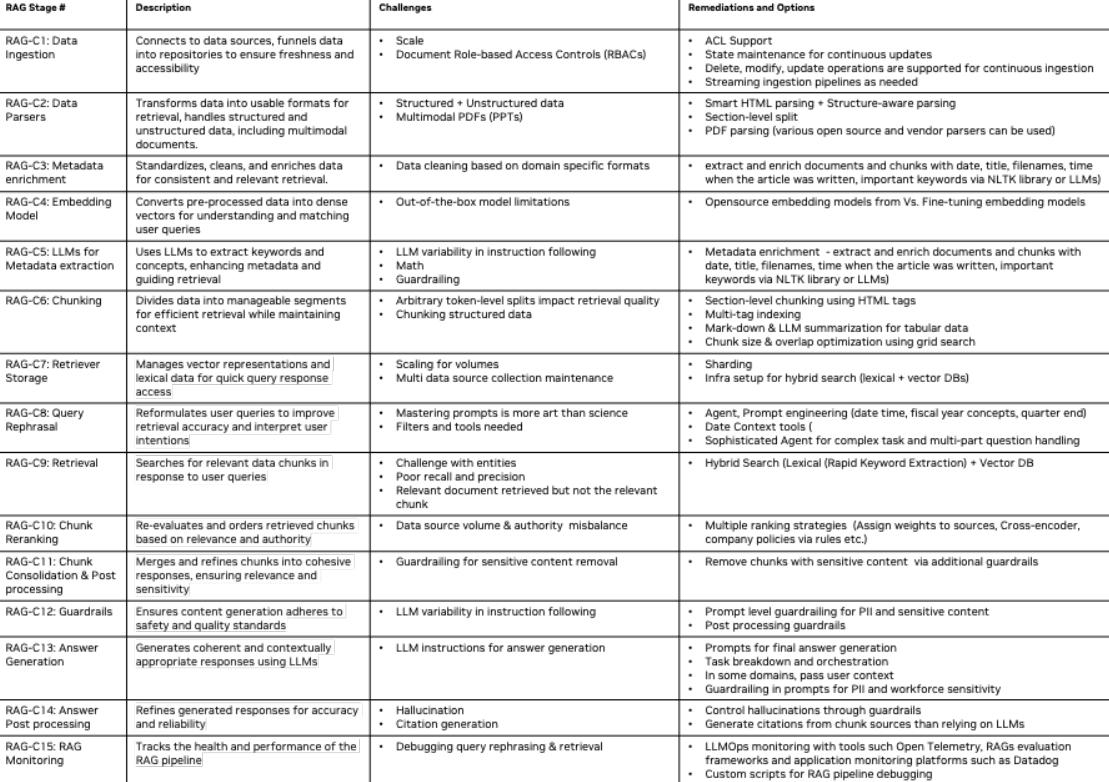

In [14]:
from IPython.display import Image
display(tables[1].to_dict())
Image(filename="cropped_images_us/table-5-2.jpg", width=1200)

In [14]:
# from IPython.display import Image, display
# import glob

# folder_path = "cropped_images_us/*.jpg"  

# image_files = glob.glob(folder_path)

# for image_file in image_files:
#     display(Image(filename=image_file))

Spanish Test

configuration

In [25]:
config = {
    "filename" : "./data/Proyecto-de-Ley-de-Atraccion-de-Inversiones-presnetado-en-AN-el-22-02-2022.pdf",                  # mandatory
    "strategy" : "hi_res",                                     # mandatory to use ``hi_res`` strategy
    "extract_images_in_pdf":True,                            # mandatory to set as ``True``
    "extract_image_block_types":["Image", "Table"],          # optional
    "extract_image_block_to_payload": False,                  # optional
    "extract_image_block_output_dir":"cropped_images_spa",  # optional - only works when ``extract_image_block_to_payload=False`
    "languages" : ["spa"] #spanish
}

In [26]:
elements_sp = partition( **config)

In [27]:
for i in elements_sp:
    print(i)


PRESIDENCIA DE LA REPÚBLICA DEL, ECUADOR
Oficio No. T. 181 =S6J-22-0083
Quito, 22 de febrero de 2022
vb e
e ASAMBLEA NACIONAL No. de trámite: 415976 Fecha recepción: 2022-02-22 17:40 No. de referencia: 1.181-SGJ-22-0033 Fecha documento: 2022-02-22 Remitente: Guillermo Alberto Santiago Lasso Mendoza guillermo lassofpresidencia.gob.ec Institu, Remitente: PRESIDENCIA DE LA REPÚBLICA Revise el estado de su documento con el usuario 0904939055 en: http://dts.asambleanacional,gob.ec Oficio: Mew: 131 P
Señora Abogada Guadalupe Llori Abarca PRESIDENTA DE LA ASAMBLEA NACIONAL En su despacho
De mi consideración:
De conformidad con la atribución que me confiere el artículo 140 de la Constitución de la República, envío a la Asamblea Nacional el proyecto de LEY ORGÁNICA PARA LA ATRACCIÓN DE INVERSIONES, FORTALECIMIENTO DEL MERCADO DE VALORES Y TRANSFORMACIÓN DIGITAL. con calificación de urgente en materia económica, para su conocimiento, discusión y aprobación.
Adjunto también el respectivo dictame

In [22]:
# from IPython.display import Image, display
# import glob

# folder_path = "cropped_images_sp/*.jpg"  

# image_files = glob.glob(folder_path)

# for image_file in image_files:
#     display(Image(filename=image_file))

In [24]:
elements_sp

 ...]

In [34]:
for i in elements_sp:
    print(i.metadata.to_dict())

{'detection_class_prob': 0.7181485891342163, 'coordinates': {'points': ((745.4891357421875, 104.583251953125), (745.4891357421875, 260.6202697753906), (900.685791015625, 260.6202697753906), (900.685791015625, 104.583251953125)), 'system': 'PixelSpace', 'layout_width': 1650, 'layout_height': 2342}, 'last_modified': '2024-07-30T17:36:34', 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'image_path': 'cropped_images_sp/figure-1-1.jpg', 'file_directory': './data', 'filename': 'Proyecto-de-Ley-de-Atraccion-de-Inversiones-presnetado-en-AN-el-22-02-2022.pdf'}
{'detection_class_prob': 0.3991025984287262, 'coordinates': {'points': ((553.4600219726562, 291.1139221191406), (553.4600219726562, 313.655517578125), (1094.693115234375, 313.655517578125), (1094.693115234375, 291.1139221191406)), 'system': 'PixelSpace', 'layout_width': 1650, 'layout_height': 2342}, 'last_modified': '2024-07-30T17:36:34', 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'file_

In [28]:
import gzip
import pickle

# Save the list to a compressed file
with gzip.open('list_sp.pickle.gz', 'wb') as f:
    pickle.dump(elements_sp, f)

In [21]:
import gzip
import pickle

# Save the list to a compressed file
with gzip.open('list_en.pickle.gz', 'wb') as f:
    pickle.dump(elements, f)

In [2]:
import gzip
import pickle

# Load the compressed list from file
with gzip.open('list_sp.pickle.gz', 'rb') as f:
    my_list = pickle.load(f)


In [3]:
for i in my_list:
    print(i.text)


PRESIDENCIA DE LA REPÚBLICA DEL, ECUADOR
Oficio No. T. 181 =S6J-22-0083
Quito, 22 de febrero de 2022
vb e
e ASAMBLEA NACIONAL No. de trámite: 415976 Fecha recepción: 2022-02-22 17:40 No. de referencia: 1.181-SGJ-22-0033 Fecha documento: 2022-02-22 Remitente: Guillermo Alberto Santiago Lasso Mendoza guillermo lassofpresidencia.gob.ec Institu, Remitente: PRESIDENCIA DE LA REPÚBLICA Revise el estado de su documento con el usuario 0904939055 en: http://dts.asambleanacional,gob.ec Oficio: Mew: 131 P
Señora Abogada Guadalupe Llori Abarca PRESIDENTA DE LA ASAMBLEA NACIONAL En su despacho
De mi consideración:
De conformidad con la atribución que me confiere el artículo 140 de la Constitución de la República, envío a la Asamblea Nacional el proyecto de LEY ORGÁNICA PARA LA ATRACCIÓN DE INVERSIONES, FORTALECIMIENTO DEL MERCADO DE VALORES Y TRANSFORMACIÓN DIGITAL. con calificación de urgente en materia económica, para su conocimiento, discusión y aprobación.
Adjunto también el respectivo dictame

In [12]:
from typing import List, Any
from unstructured.partition.auto import partition
import os
import gzip
import pickle

class readFile:
    def __init__(self, 
                 filename:str, 
                 strategy:str="hi_res",
                 extract_images_in_pdf: bool = True,
                 extract_image_block_types: List[str]=["Image", "Table"],
                 extract_image_block_to_payload:bool = False,
                 extract_image_block_output_dir : str="cropped_images_spa",
                 languages: List[str]=["eng"]
                 ) -> None:
            
        self.config = {}
            
        if filename == "":
            raise TypeError("filename is empty.")
        self.config["filename"] = filename
        self.config["strategy"] = strategy
        if extract_images_in_pdf:
            if extract_image_block_output_dir == "":
                raise TypeError("Please, enter directory where to save the images and tables to extract.")
            self.config["extract_images_in_pdf"] = extract_images_in_pdf
            self.config["extract_image_block_types"] = extract_image_block_types
            self.config["extract_image_block_to_payload"] = extract_image_block_to_payload
            self.config["extract_image_block_output_dir"] = extract_image_block_output_dir
        self.config["languages"] = languages  

    def __call__(self) -> Any:
        original_extracted = partition( **self.config) 
        sorted_data_extracted = self.extract_data_from_unstructured(original_extracted)
        self.save_data_structure(data=sorted_data_extracted)
        return original_extracted, sorted_data_extracted

    
    def extract_data_from_unstructured(self, data: List) -> List:
        start_flag = bool(True)
        page_numer = int(0)
        new_data_obj = Any
        new_data = list([])
        
        for i in range(len(data)):
             #extract text no images nor tables
            if data[i].category !=  "Image" or data[i].category !=  "Table":
                metadata = data[i].metadata.to_dict()
                   
                if start_flag:
                    page_numer = metadata["page_number"]
                    new_data_obj = {
                        "page_number": metadata["page_number"],
                        "text": data[i].text,
                        "language": metadata["languages"],
                        "source": metadata['filename']
                    }
                    start_flag = False
            
            if page_numer == metadata["page_number"]:
                new_data_obj["text"]+= f"\n{data[i].text}"
            else:
                new_data.append(new_data_obj) # save data
                new_data_obj = {
                    "page_number": metadata["page_number"],
                    "text": data[i].text,
                    "language": metadata["languages"],
                    "source": metadata['filename']
                }
                page_numer = metadata["page_number"]

            if i == len(data)-1:
                new_data.append(new_data_obj)

            self.filename = metadata['filename']
        return new_data
    
    
    def create_directory_if_not_exists(self, directory_path: str) -> None:
        os.makedirs(directory_path, exist_ok=True)
        print(f"Directory '{directory_path}' is created or already exists.")
    
    def save_data_structure(self, data:List, save_flag:bool=True,  directory_path:str='./data_extracted')-> None:
        if save_flag == False:
            return
        self.create_directory_if_not_exists(directory_path)
        file = self.filename.split('.')[0]
        path = os.path.join(directory_path, file)
        with gzip.open(f'{path}.pickle.gz', 'wb') as f:
            pickle.dump(data, f)

In [13]:
reader = readFile(filename = "../data/test.pdf",languages = ["spa"])

In [14]:
original_extracted, sorted_data_extracted = reader()

Directory './data_extracted' is created or already exists.


In [15]:
sorted_data_extracted

[{'page_number': 1,
  'text': 'Abstracto\nAbstracto\nEcuador fue uno de los primeros países latinoamericanos en enfrentar el brote del COVID-19, con un rápido aumento de casos y muertes. La crisis sanitaria comenzó a manifestarse con fuerza en marzo de 2020, lo que llevó al gobierno a implementar medidas de confinamiento y restricciones similares a las propuestas internacionalmente. La situación se complicó por la fragilidad del sistema de salud y la economía ya debilitada.\nLa pandemia de COVID-19 en Ecuador fue el resultado del contagio masivo de COVID-19 en la población ecuatoriana, afectando profundamente sus estructuras sociales, económicas y sanitarias. La primera ola del virus desbordó el sistema de salud, con más de 500,000 casos y 33,000 muertes reportadas hasta diciembre del 2021, evidenciando las vulnerabilidades en términos de salud del Ecuador.\nAdemás, la economía ecuatoriana sufrió una contracción del PIB en 2020, con una notable disminución de las remesas y el cierre de

In [23]:
for i in original_extracted:
    print(i)

Abstracto
Ecuador fue uno de los primeros países latinoamericanos en enfrentar el brote del COVID-19, con un rápido aumento de casos y muertes. La crisis sanitaria comenzó a manifestarse con fuerza en marzo de 2020, lo que llevó al gobierno a implementar medidas de confinamiento y restricciones similares a las propuestas internacionalmente. La situación se complicó por la fragilidad del sistema de salud y la economía ya debilitada.
La pandemia de COVID-19 en Ecuador fue el resultado del contagio masivo de COVID-19 en la población ecuatoriana, afectando profundamente sus estructuras sociales, económicas y sanitarias. La primera ola del virus desbordó el sistema de salud, con más de 500,000 casos y 33,000 muertes reportadas hasta diciembre del 2021, evidenciando las vulnerabilidades en términos de salud del Ecuador.
Además, la economía ecuatoriana sufrió una contracción del PIB en 2020, con una notable disminución de las remesas y el cierre de numerosas empresas entre 2020 y 2021.
Este e

In [44]:
test = reader.extract_data_from_unstructured(original_extracted)

In [40]:
extract_data_from_unstructured(original_extracted)

Abstracto 1
Ecuador fue uno de los primeros países latinoamericanos en enfrentar el brote del COVID-19, con un rápido aumento de casos y muertes. La crisis sanitaria comenzó a manifestarse con fuerza en marzo de 2020, lo que llevó al gobierno a implementar medidas de confinamiento y restricciones similares a las propuestas internacionalmente. La situación se complicó por la fragilidad del sistema de salud y la economía ya debilitada. 1
La pandemia de COVID-19 en Ecuador fue el resultado del contagio masivo de COVID-19 en la población ecuatoriana, afectando profundamente sus estructuras sociales, económicas y sanitarias. La primera ola del virus desbordó el sistema de salud, con más de 500,000 casos y 33,000 muertes reportadas hasta diciembre del 2021, evidenciando las vulnerabilidades en términos de salud del Ecuador. 1
Además, la economía ecuatoriana sufrió una contracción del PIB en 2020, con una notable disminución de las remesas y el cierre de numerosas empresas entre 2020 y 2021. 

[{'page_number': 1,
  'text': 'Abstracto\nAbstracto\nEcuador fue uno de los primeros países latinoamericanos en enfrentar el brote del COVID-19, con un rápido aumento de casos y muertes. La crisis sanitaria comenzó a manifestarse con fuerza en marzo de 2020, lo que llevó al gobierno a implementar medidas de confinamiento y restricciones similares a las propuestas internacionalmente. La situación se complicó por la fragilidad del sistema de salud y la economía ya debilitada.\nLa pandemia de COVID-19 en Ecuador fue el resultado del contagio masivo de COVID-19 en la población ecuatoriana, afectando profundamente sus estructuras sociales, económicas y sanitarias. La primera ola del virus desbordó el sistema de salud, con más de 500,000 casos y 33,000 muertes reportadas hasta diciembre del 2021, evidenciando las vulnerabilidades en términos de salud del Ecuador.\nAdemás, la economía ecuatoriana sufrió una contracción del PIB en 2020, con una notable disminución de las remesas y el cierre de

In [39]:


# cretae object with data information and 
def extract_data_from_unstructured(data: List) -> List:
    start_flag = bool(True)
    page_numer = int(0)
    new_data_obj = Any
    new_data = list([])
    count = 0

    for i in range(len(data)):
        #extract text no images nor tables
        if data[i].category !=  "Image" or data[i].category !=  "Table":
            metadata = data[i].metadata.to_dict()
            # run just when 
            if start_flag:
                page_numer = metadata["page_number"]
                new_data_obj = {
                    "page_number": metadata["page_number"],
                    "text": data[i].text,
                    "language": metadata["languages"],
                    "filename": metadata['filename']
                }
                start_flag = False
            
            if page_numer == metadata["page_number"]:
                print(data[i].text, page_numer)
                new_data_obj["text"]+= f"\n{data[i].text}"
            else:
                print(data[i].text, page_numer)
                new_data.append(new_data_obj) # save data
                new_data_obj = {
                    "page_number": metadata["page_number"],
                    "text": data[i].text,
                    "language": metadata["languages"],
                    "filename": metadata['filename']
                }
                page_numer = metadata["page_number"]

            if i == len(data)-1:
                new_data.append(new_data_obj)


    return new_data

In [21]:
data = extract_data_from_unstructured(my_list)

In [22]:
for i in data:
    print(i)

{'page_number': 1, 'text': '\n\nPRESIDENCIA DE LA REPÚBLICA DEL, ECUADOR\nOficio No. T. 181 =S6J-22-0083\nQuito, 22 de febrero de 2022\nvb e\ne ASAMBLEA NACIONAL No. de trámite: 415976 Fecha recepción: 2022-02-22 17:40 No. de referencia: 1.181-SGJ-22-0033 Fecha documento: 2022-02-22 Remitente: Guillermo Alberto Santiago Lasso Mendoza guillermo lassofpresidencia.gob.ec Institu, Remitente: PRESIDENCIA DE LA REPÚBLICA Revise el estado de su documento con el usuario 0904939055 en: http://dts.asambleanacional,gob.ec Oficio: Mew: 131 P\nSeñora Abogada Guadalupe Llori Abarca PRESIDENTA DE LA ASAMBLEA NACIONAL En su despacho\nDe mi consideración:\nDe conformidad con la atribución que me confiere el artículo 140 de la Constitución de la República, envío a la Asamblea Nacional el proyecto de LEY ORGÁNICA PARA LA ATRACCIÓN DE INVERSIONES, FORTALECIMIENTO DEL MERCADO DE VALORES Y TRANSFORMACIÓN DIGITAL. con calificación de urgente en materia económica, para su conocimiento, discusión y aprobación.

In [1]:
for el in my_list:
    if el.category !=  "Image" or el.category !=  "Table":
        print(el)
        print(el.metadata.to_dict())

NameError: name 'my_list' is not defined

In [5]:
print("\n\n".join([str(el) for el in my_list]))



PRESIDENCIA DE LA REPÚBLICA DEL, ECUADOR

Oficio No. T. 181 =S6J-22-0083

Quito, 22 de febrero de 2022

vb e

e ASAMBLEA NACIONAL No. de trámite: 415976 Fecha recepción: 2022-02-22 17:40 No. de referencia: 1.181-SGJ-22-0033 Fecha documento: 2022-02-22 Remitente: Guillermo Alberto Santiago Lasso Mendoza guillermo lassofpresidencia.gob.ec Institu, Remitente: PRESIDENCIA DE LA REPÚBLICA Revise el estado de su documento con el usuario 0904939055 en: http://dts.asambleanacional,gob.ec Oficio: Mew: 131 P

Señora Abogada Guadalupe Llori Abarca PRESIDENTA DE LA ASAMBLEA NACIONAL En su despacho

De mi consideración:

De conformidad con la atribución que me confiere el artículo 140 de la Constitución de la República, envío a la Asamblea Nacional el proyecto de LEY ORGÁNICA PARA LA ATRACCIÓN DE INVERSIONES, FORTALECIMIENTO DEL MERCADO DE VALORES Y TRANSFORMACIÓN DIGITAL. con calificación de urgente en materia económica, para su conocimiento, discusión y aprobación.

Adjunto también el respectiv

In [11]:
Images = [el.to_dict() for el in my_list if el.category ==  "Image"]

In [12]:
Images

[{'type': 'Image',
  'element_id': 'ea98ecad1247f85166cc5001202c1513',
  'text': '',
  'metadata': {'detection_class_prob': 0.7181485891342163,
   'coordinates': {'points': ((745.4891357421875, 104.583251953125),
     (745.4891357421875, 260.6202697753906),
     (900.685791015625, 260.6202697753906),
     (900.685791015625, 104.583251953125)),
    'system': 'PixelSpace',
    'layout_width': 1650,
    'layout_height': 2342},
   'last_modified': '2024-07-30T17:36:34',
   'filetype': 'application/pdf',
   'languages': ['spa'],
   'page_number': 1,
   'image_path': 'cropped_images_us/figure-1-1.jpg',
   'file_directory': './data',
   'filename': 'Proyecto-de-Ley-de-Atraccion-de-Inversiones-presnetado-en-AN-el-22-02-2022.pdf'}},
 {'type': 'Image',
  'element_id': '7a0984396ab90dc5d6579fa6f7c18935',
  'text': 'vb e',
  'metadata': {'detection_class_prob': 0.7813934683799744,
   'coordinates': {'points': ((1304.02099609375, 81.49830627441406),
     (1304.02099609375, 152.48353576660156),
    

In [13]:
Tables = [el.to_dict() for el in my_list if el.category ==  "Table"]

In [14]:
Tables

[{'type': 'Table',
  'element_id': 'c4c72adf0fe45b5ef2dd294fa3950b85',
  'text': 'A A A A 3 2. Análisis normativo .. 4 3. Análisis de impacto recaudatorio .....cmocooomommmmmmmmmmmmmmmmmms 15 4. Análisis de impacto en el ciclo recaudatorio de las propuestas ......o.occomommmmoo 20 5. Conclusiones',
  'metadata': {'detection_class_prob': 0.7006901502609253,
   'coordinates': {'points': ((228.2821807861328, 467.3625183105469),
     (228.2821807861328, 764.0098876953125),
     (1462.7708740234375, 764.0098876953125),
     (1462.7708740234375, 467.3625183105469)),
    'system': 'PixelSpace',
    'layout_width': 1658,
    'layout_height': 2342},
   'last_modified': '2024-07-30T17:36:34',
   'filetype': 'application/pdf',
   'languages': ['spa'],
   'page_number': 136,
   'image_path': 'cropped_images_us/table-136-1.jpg',
   'parent_id': '809996c5c3e11ef9d717cc63d8012f5e',
   'file_directory': './data',
   'filename': 'Proyecto-de-Ley-de-Atraccion-de-Inversiones-presnetado-en-AN-el-22-02-202

In [8]:
from unstructured.partition.html import partition_html

url = "https://www.cnn.com/2023/01/30/sport/empire-state-building-green-philadelphia-eagles-spt-intl/index.html"
elements = partition_html(url=url)
print("\n\n".join([str(el) for el in elements]))

Miles Sanders scores a touchdown against the San Francisco 49ers during the NFC Championship game at Lincoln Financial Field.

CNN
         —

The Empire State Building was lit in green and white to celebrate the Philadelphia Eagles’ victory in the NFC Championship game on Sunday – a decision that’s sparked a bit of a backlash in the Big Apple.

The Eagles advanced to the Super Bowl for the first time since 2018 after defeating the San Francisco 49ers 31-7, and the Empire State Building later tweeted how it was marking the occasion.

Fly @Eagles Fly! We’re going Green and White in honor of the Eagles NFC Championship Victory. pic.twitter.com/RNiwbCIkt7— Empire State Building (@EmpireStateBldg)

January 29, 2023

But given the fierce rivalry between the Eagles and the New York Giants, who the Super Bowl-bound team had comfortably defeated in the previous round of the NFL Playoffs, many were left questioning the move.

“Did y’all lose a bet,” ESPN contributor Mina Kimes asked in response

In [1]:
from extractData import readFile

In [2]:
reader = readFile(filename = "./data/test.pdf", languages = ["spa"])

In [3]:
original_extracted, sorted_data_extracted = reader()

Directory './data_extracted' is created or already exists.


In [7]:
for i in sorted_data_extracted:
    print(i)

{'page_number': 1, 'text': 'Abstracto\nAbstracto\nEcuador fue uno de los primeros países latinoamericanos en enfrentar el brote del COVID-19, con un rápido aumento de casos y muertes. La crisis sanitaria comenzó a manifestarse con fuerza en marzo de 2020, lo que llevó al gobierno a implementar medidas de confinamiento y restricciones similares a las propuestas internacionalmente. La situación se complicó por la fragilidad del sistema de salud y la economía ya debilitada.\nLa pandemia de COVID-19 en Ecuador fue el resultado del contagio masivo de COVID-19 en la población ecuatoriana, afectando profundamente sus estructuras sociales, económicas y sanitarias. La primera ola del virus desbordó el sistema de salud, con más de 500,000 casos y 33,000 muertes reportadas hasta diciembre del 2021, evidenciando las vulnerabilidades en términos de salud del Ecuador.\nAdemás, la economía ecuatoriana sufrió una contracción del PIB en 2020, con una notable disminución de las remesas y el cierre de nu